# Multilayer perceptron

Cada neorónio é uma perceptron.

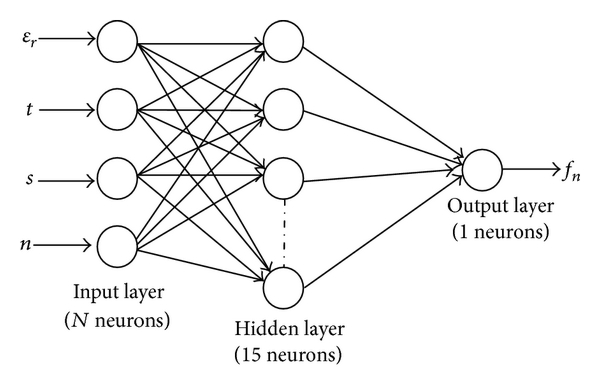

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

## Assim..

Se uma perceptron, calcula-se como $[\sum_{i=0}^{n} (Xi+Wi)] + b$ 2 perceptron se calculam $N_0 = [\sum_{i=0}^{n} (X_{0i}i+W_{0i})] + b_0$ e $N_1 = [\sum_{i=0}^{n} (X_{1i}i+W_{1i})] + b_1$.

Isto é...

Multiplicação de matrizes

### Desta forma...

Cada camada é uma matriz de pesos, onde cada linha representa um neorónio.

Sendo que o bias é correspondente a quantidade de neoronios

In [2]:
def createLayer(nin,nout):
    tmp = []
    for i in range(nin):
        tmp.append([])
        for j in range(nout):
            tmp[i].append(random.random())
    return np.array(tmp)

WL1 = createLayer(2,2)

WL2 = createLayer(1,2)

bias1 = createLayer(2,1)

bias2 = createLayer(1,1)


## Função sigmoid e a derivada da sigmoid

$\sigma(x) = \frac{1}{1 + e^{-x}}$

$\sigma'(x) = \sigma(x) * (1 - \sigma(x))$

In [3]:
def sigmoid(x):
#     print(x)
    try:
        return 1 / (1 + math.exp(-x))
    except:
        print("err ",x)
        return None
    
def d_sigmoid(x):
    return x * (1-x)


sigmoid = np.vectorize(sigmoid)
d_sigmoid = np.vectorize(d_sigmoid)

Criando amostras aleatórias

In [4]:
def createSamples(list1, list2, label, bias = False):
    random.shuffle(list1)
    random.shuffle(list2)
    tmp = []
    for p1, p2 in zip(list1, list2):
        if bias:
            tmp.append([p1, p2, 1, label])
        else:
            tmp.append([p1, p2, label])
    return tmp

In [5]:
qte_sample = 30
itemsx = []
itemsy = []

for i in range(qte_sample):
    itemsy.append(random.random()*5+5)
    itemsx.append(random.random()*15)

rosas = createSamples(itemsx, itemsy, 0, True)

In [6]:
qte_sample = 30
itemsx = []
itemsy = []

for i in range(qte_sample):
    itemsy.append(random.random()*5)
    itemsx.append(random.random()*15+15)
    
violetas = createSamples(itemsx, itemsy, 1, True)

In [7]:
points = np.array(rosas + violetas)

np.take(points,np.random.permutation(points.shape[0]),axis=0,out=points)

# 2 is bias
valor = points[:,3]
points = points[:,[0,1]]
# Normalizando
points[:,0] *= 1/30
points[:,1] *= 1/10


## XOR

In [8]:
# XOR
# points = [[1,0],[0,0],[0,1],[1,1]]
# valor = [1,0,1,0]

# Feed forward

o processo de feedforwart é..

dada a entrada X e os pesos W
$$
X = 
\quad
\begin{bmatrix} 
a\\
b
\end{bmatrix}
\quad
$$
$$
W = 
\quad
\begin{bmatrix} 
c & d \\
e & f 
\end{bmatrix}
\quad
$$

O processo de feed forward é dado por $H = W \times X$ então $H = \sigma(H + b)$ entre uma camada e outra.
Na proxima camada a entrada é a saida da anterior.

In [9]:
def predict(X):
    
    X = np.array(X).T 
    W = WL1    

    hidem = W.dot(X)
    hidem = hidem + bias1
    hidems = sigmoid(hidem)

    X = hidems
    W = WL2  

    exitr = W.dot(X)
    exitr = exitr + bias2
    return sigmoid(exitr)[0][0]

print(WL1)
print("--------")
print(WL2)
print("--------")
print(bias1)
print("--------")
print(bias2)
print("--------")
predict(np.array([1,1]))

[[0.30238424 0.56235407]
 [0.55344496 0.80627986]]
--------
[[0.89624659 0.69250326]]
--------
[[0.37749599]
 [0.24431254]]
--------
[[0.74664269]]
--------


0.876837485463761

# Treinamento...

Como visualizar problemas Ndimencionais?

Tentando encontrar o minimo local da  função de custo.

In [10]:
lr = 0.1
# print(WL1)
# print(WL1.dot(np.array([1,1,1]).T))

def treinaPerceptron(points, valor):
    global WL1, WL2, bias1, bias2
    for x_train, y_train in zip(points, valor):
#         y_pred = predict(x_train)

        X = np.array([x_train]).T 
        W = WL1    
        
        hidem = W.dot(X)
        if hidem.shape != bias1.shape:
            print("erro1") 
            return
        
        hidem = hidem + bias1
        hidem = sigmoid(hidem)
        
        X = hidem
        W = WL2  
        
        exitr = W.dot(X)
        if exitr.shape != bias2.shape:
            print("erro2")
           
            return
        exitr = exitr + bias2
        
        y_pred = sigmoid(exitr) 
# -------------------------------------
#         print(y_train, y_pred)
        e = (y_train - y_pred)

        d_y_pred = d_sigmoid(y_pred)
#         print(d_y_pred)
        grad = d_y_pred * e
        grad = grad * lr
        
        if grad.shape != bias2.shape:
            print("erro3")
            print(grad.shape)
            print(bias1.shape)
            return
        
        bias2 = bias2 + grad
#         print(grad)
        WL2_D = grad.dot(hidem.T)
#         print(WL2.shape, WL2_D.shape)
        WL2 = WL2 + WL2_D
        
        h_e = WL2.T.dot(e)
        d_h_e = d_sigmoid(hidem)
        
        grad = d_h_e * h_e
        grad = grad * lr
        
        if grad.shape != bias1.shape:
            print("erro4")
            return
        
        bias1 = bias1 + grad
        WL1_D = grad.dot(np.array([x_train]))
        WL1 = WL1 + WL1_D
        
       
        
treinaPerceptron(points, valor)
print("-------")
print(WL1)
print("-------")
print(WL2)
print("-------")
print(bias1)
print("-------")
print(bias2)
print("-------")

-------
[[0.25839622 0.24572167]
 [0.52390133 0.58798877]]
-------
[[0.72093879 0.50408654]]
-------
[[0.02758838]
 [0.00295929]]
-------
[[0.47418883]]
-------


# Visualizar...

In [11]:
def visualiza(points, valor, zero1=False):
    img = np.ones((300, 400)) 
    # grab the image dimensions
    w = img.shape[0]
    h = img.shape[1]

    if zero1:
        for x in range(0, w):
            for y in range(0, h):
                # threshold the pixel
#                 print(predict([x/w, y/h]), (predict([x/w, y/h]) > 0.5))
                if (predict([x/w, y/h]) > 0.5):
                    img[x][y] = 1
                else:
                    img[x][y] = 0 
    else:
        # loop over the image, pixel by pixel
        for x in range(0, w):
            for y in range(0, h):
                # threshold the pixel
                img[x][y] = predict([x/w, y/h])
    
    plt.imshow(img, origin='lower')
    plt.colorbar()
    for x, y in zip(points,valor):
        if y == 1:
            plt.scatter(x=x[0]*h, y=x[1]*w, c='r', s=40)
        else:
            plt.scatter(x=x[0]*h, y=x[1]*w, c='b', s=40)
    plt.show()

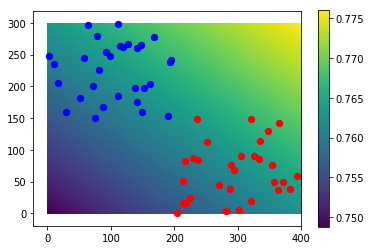

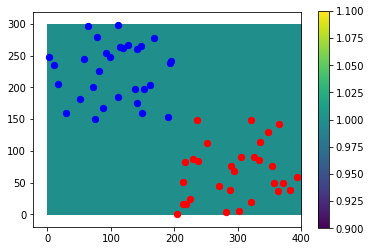

array([[0.25839622, 0.24572167],
       [0.52390133, 0.58798877]])

In [12]:
visualiza(points, valor)
visualiza(points, valor, True)
WL1

[[0.25839622 0.24572167]
 [0.52390133 0.58798877]]
-----
[[ 22.83895588 -15.73755533]
 [ 12.71086964 -10.20947285]]
-----
[[9.16002231 3.19095911]]


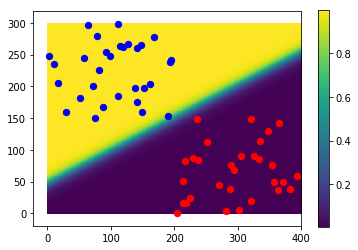

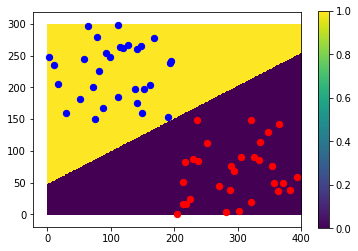

In [13]:
# print(WL1.dot(np.matrix([[1],[1],[1]])))
# print(predict([0,1,1]))
# def predict(var):
#     return 1.0
print(WL1)
for i in range(10000):
    treinaPerceptron(points, valor)
print("-----")
print(WL1)
print("-----")
print(WL2)
    
visualiza(points, valor)
visualiza(points, valor, True)
